### 로지스틱 회귀의 이진 분류
### 로지스틱 회귀 분석을 이용하여 질병 진단
### 결정 트리의 다중 분류
### 결정 트리 분석을 이용해서 움직임을 분류

##### 로지스틱 회귀 : 분류에 사용( 선형회귀는 직선의 방정식,  로지스틱은 곡선의 방정식  S자 함수--> True(0)/False(1)
##### 시그모이드함수 :  로지스틱회귀에 사용하는 S자 함수
##### y = 1 / ( 1+e*(ax+b) )
#####  공부시간 1 5 10 15 20 -> 점수 40 55 65 70 80 ---> 선형회귀
#####  공부시간 1 5 10 15 20 -> 불합격,불합격,불합격,합격,합격  -> 로지스틱회귀 S자 함수
##### 선형회귀 모델은 실제값과 예측값의 오차에 기반한 지표를 사용  : mse rmse r2score
##### 로지스틱회귀는 이진 분류의 결과를 평가하기위해 오차행렬--> 정밀도, 재현율, F1스코어, ROC커브를 사용(시각화를 통해 판단)

In [1]:
from IPython.display import Image
Image(url='https://url.kr/je72kq',width=500)
#Image(filename='D:/confusion_matrix.PNG',width=500)

##### 오차행렬(Confution Matrix)  엑셀표 참고
##### ROC 기반 AUC 스코어
##### 오차 행렬의 FPR이 변할때 TPR이 어떻게 변하는지 나타내는 곡선
##### FPR: 실제 Nagative인 데이터를 Positive로 거짓False 으로 예측한 비율
##### TPR: 실제 Positive인 데이터를 Positive로 참True 으로 예측한 비율
##### FPR = FP  / (FP+TN)
##### 1에 가까울수록 성능이 좋다.
##### orc_auc_score 함수 제공(사이킷런)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [3]:
b_cancer =  load_breast_cancer()

In [4]:
#print(b_cancer.DESCR)

In [5]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
b_cancer_df.shape

(569, 31)

In [7]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### feature 의 개수가 많을때--> 스케일링을 맞춰준다..

In [8]:
from sklearn.preprocessing import StandardScaler  # 평균이 0  분산이 1되는 정규분포형태의 데이터
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
y = b_cancer_df['diagnosis']
y.shape

(569,)

In [10]:
x = b_cancer_df.drop(['diagnosis'], axis=1, inplace=False)
x.shape

(569, 30)

In [11]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=0, test_size=0.3)

In [12]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)
x_train_scaled.shape,  x_test_scaled.shape

((398, 30), (171, 30))

In [13]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [14]:
# 예측값 구하기
y_predict = lr.predict(x_test_scaled)

In [15]:
# 성능확인
from sklearn.metrics import confusion_matrix, accuracy_score # 정확도
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# 정밀도, 재현율, F1 

In [16]:
# 오차행렬
confusion_matrix(y_test, y_predict)

array([[ 61,   2],
       [  4, 104]], dtype=int64)

In [17]:
accuracy =  accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall =  recall_score(y_test, y_predict)
f1 =  f1_score(y_test, y_predict)
roc_auc =  roc_auc_score(y_test, y_predict)

In [18]:
print(f"정확도:{round(accuracy,3)} 정밀도:{round(precision,3)} 재현율:{round(recall,3)} F1:{round(f1,3)}")

정확도:0.965 정밀도:0.981 재현율:0.963 F1:0.972


In [19]:
print(f"roc_auc:{round(roc_auc,3)}")

roc_auc:0.966


#### 센서데이터 움직임 확인
#### 결정트리, 정보이득지수, 지니계수 ,Graphviz 패키지

##### 결정트리-->스무고개  다중분류에 많이 사용
##### 까치 펭귄 개구리 다람쥐 호랑이 

# 정보이득 지수
### 정보이득 엔트로피 개념을 기반
###### 엔트로피 : 데이터 집합의 혼잡도
###### 데이터집합에 다른 데이터 = 균일도가 떨어짐-> 혼잡도가 높아, 엔트로피가 높아짐
###### 데이터집합에 같은 데이터 = 균일도가 높아짐-> 혼잡도가 떨어짐, 엔트로피가 낮아짐
### 정보이득지수 : 혼잡도가 줄어들어 얻게 되는 이득   1-엔트로피
### 결정트리 : 정보이득 지수가 높은 피처를 분활 기준으로 삼는다

# 지니계수
#### 소득의 불규형 정도를 나타내--> 머신러닝에서는 데이터의 순도를 나타냄
#### 지니계수가 0이면 완전 순수한 데이터 집합
#### 지니계수가 높을수록 순도가 낮은 데이터 집합

In [20]:
# 피처 read
feature_name_df= pd.read_csv('D:/uci/UCI_HAR_Dataset/features.txt',sep='\s+', 
            header=None,names=['index','feature_name'])

# 데이터 집합에서 중복을 확인하고
# 중복을 찾아서 제거
# 중복을 찾아서 변경
# 데이터 프레임 / 리스트 / 넘파이 배열 / 배열


In [21]:
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [22]:
feature_name_df.to_csv("D:feature_name.csv")

In [79]:
df= pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/20220308/UCI%20HAR%20Dataset/feature_name.csv")
feature_name_df = df.iloc[:,1:]
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [80]:
feature_name_df.shape

(561, 2)

In [133]:
pd.__version__  # 0.24.2 버전보다 높으면 중복에러를 발생

'1.4.1'

In [137]:
561- len(set(feature_name_df['feature_name']))

84

In [141]:
feature_name_df.groupby('feature_name').count().head(10)

,index
feature_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
"angle(tBodyGyroJerkMean,gravityMean)",1
"angle(tBodyGyroMean,gravityMean)",1
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3


In [159]:
feature_name_df.groupby('feature_name').cumcount()


0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [158]:
temp = [1,1,1,2,3,4,4,5,5,6,6,1,2,3]
temp_df = pd.DataFrame(temp, columns=['num']).groupby('num').cumcount()
pd.DataFrame({
    'origin':temp,
    'duplicate':temp_df
})


,origin,duplicate
0,1,0
1,1,1
2,1,2
3,2,0
4,3,0
5,4,0
6,4,1
7,5,0
8,5,1
9,6,0


In [171]:
feature_name_cumcount =  feature_name_df.groupby('feature_name').cumcount()
f_df = pd.DataFrame({
    'cumcountFeature':feature_name_cumcount,
    'originName':feature_name_df['feature_name']
})

In [181]:
f_df
#for i in  zip(f_df['originName'],f_df['cumcountFeature'])
for i in zip(f_df['originName'],f_df['cumcountFeature']):
    print(i)
    break

feature_name =  [ ''.join(i) for i in zip(f_df['originName'],f_df['cumcountFeature'].map(str) ) ]   
print(len(feature_name))
print(len(set(feature_name)))
# 중복이 없음을 확인

('tBodyAcc-mean()-X', 0)
561
561


In [191]:
x_train= pd.read_csv("D:/uci/UCI_HAR_Dataset/train/X_train.txt", sep='\s+',names=feature_name)
y_train= pd.read_csv("D:/uci/UCI_HAR_Dataset/train/y_train.txt", sep='\s+',names=['action'])

In [192]:
x_test= pd.read_csv("D:/uci/UCI_HAR_Dataset/test/X_test.txt", sep='\s+',names=feature_name)
y_test= pd.read_csv("D:/uci/UCI_HAR_Dataset/test/y_test.txt", sep='\s+',names=['action'])

In [193]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [199]:
x_train.head()

,tBodyAcc-mean()-X0,tBodyAcc-mean()-Y0,tBodyAcc-mean()-Z0,tBodyAcc-std()-X0,tBodyAcc-std()-Y0,tBodyAcc-std()-Z0,tBodyAcc-mad()-X0,tBodyAcc-mad()-Y0,tBodyAcc-mad()-Z0,tBodyAcc-max()-X0,...,fBodyBodyGyroJerkMag-meanFreq()0,fBodyBodyGyroJerkMag-skewness()0,fBodyBodyGyroJerkMag-kurtosis()0,"angle(tBodyAccMean,gravity)0","angle(tBodyAccJerkMean),gravityMean)0","angle(tBodyGyroMean,gravityMean)0","angle(tBodyGyroJerkMean,gravityMean)0","angle(X,gravityMean)0","angle(Y,gravityMean)0","angle(Z,gravityMean)0"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [201]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [202]:
label_name_df = pd.read_csv('D:/uci/UCI_HAR_Dataset/activity_labels.txt',
                            sep='\s+',header=None,names=['index','label'])
label_name_df.head()

,index,label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING


In [203]:
# index 제거하고 label만 리스트로 저장
label_name =  label_name_df.iloc[:,1].values.tolist()

In [204]:
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [205]:
# 모델 선정  결정트리
from sklearn.tree import DecisionTreeClassifier

In [206]:
dt_HAR =  DecisionTreeClassifier(random_state=156)

In [207]:
dt_HAR.fit(x_train,y_train)

DecisionTreeClassifier(random_state=156)

In [208]:
y_predict = dt_HAR.predict(x_test)

In [209]:
from sklearn.metrics import accuracy_score  # 분류의 정확도 를 측정

In [211]:
accuracy =  accuracy_score(y_test,y_predict)
accuracy   

0.8547675602307431

In [218]:
dt_HAR.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

### 결정트리는 모델을 만들때 자동으로 결정되는 파라메터의 매개변수의 값을 수정하면 성능을 높일수가 있음 - 하이퍼 파라메터 튜닝

##### 정확도를 검사하여 최적의 하이퍼 파라메터를 찾는 작업을 해 주는 GridSearchCV 모듈

In [214]:
from sklearn.model_selection import GridSearchCV

In [247]:
# parameter는 dic 형태로 
parameter = {
    'max_depth':[6,8,10,12],
    'random_state':[0,10,50,100,150,200]
}

In [248]:
# cv=5 총 반복횟수(학습 횟수)
grid_cv= GridSearchCV(dt_HAR,param_grid=parameter,scoring='accuracy',return_train_score=True,verbose=5)

In [249]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=6, random_state=0;, score=(train=0.963, test=0.815) total time=   1.4s
[CV 2/5] END max_depth=6, random_state=0;, score=(train=0.939, test=0.870) total time=   1.4s
[CV 3/5] END max_depth=6, random_state=0;, score=(train=0.946, test=0.797) total time=   1.3s
[CV 4/5] END max_depth=6, random_state=0;, score=(train=0.932, test=0.858) total time=   1.4s
[CV 5/5] END max_depth=6, random_state=0;, score=(train=0.944, test=0.870) total time=   1.3s
[CV 1/5] END max_depth=6, random_state=10;, score=(train=0.963, test=0.816) total time=   1.4s
[CV 2/5] END max_depth=6, random_state=10;, score=(train=0.939, test=0.872) total time=   1.3s
[CV 3/5] END max_depth=6, random_state=10;, score=(train=0.946, test=0.799) total time=   1.3s
[CV 4/5] END max_depth=6, random_state=10;, score=(train=0.932, test=0.864) total time=   1.3s
[CV 5/5] END max_depth=6, random_state=10;, score=(train=0.944, test=0.871) total time= 

GridSearchCV(estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'random_state': [0, 10, 50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [250]:
cv_results_df = pd.DataFrame( grid_cv.cv_results_)
#cv_results_df[['param_max_depth','param_min_samples_split','mean_test_score','mean_train_score'] ]
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_random_state', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [251]:
grid_cv.best_score_ , grid_cv.best_params_

(0.8571916924485634, {'max_depth': 8, 'random_state': 50})

In [252]:
best_dt_HAR =  grid_cv.best_estimator_

In [253]:
best_y_predict = best_dt_HAR.predict(x_test)
best_accuracy = accuracy_score(y_test, best_y_predict)
best_accuracy

0.8700373260943333

In [255]:
# 561개의 컬럼중에 어느컬럼의 중요도가 높을까? 
best_dt_HAR.feature_importances_
# 시각화를 통해 중요한 피처를 살펴보자

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.17472908e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.69429069e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.02719651e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.22614094e-03, 6.27558793e-03, 2.97962940e-03,
       2.52760705e-01, 2.07212988e-03, 2.90548206e-03, 0.00000000e+00,
      

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=x_train.columns)

In [258]:
# top 10
feature_toop10 =  feature_importance_values_s.sort_values(ascending=False)[:10]

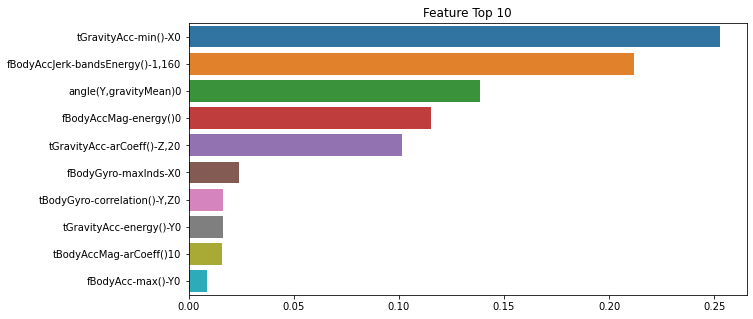

In [259]:
plt.figure(figsize=(10,5))
plt.title('Feature Top 10')
sns.barplot(x = feature_toop10,y=feature_toop10.index)
plt.show()

In [272]:
import os
os.environ["PATH"] += os.pathsep+'C:/Program Files/Graphviz/bin'

In [276]:
os.environ["PATH"]

'C:\\Users\\User\\anaconda3\\envs\\ml;C:\\Users\\User\\anaconda3\\envs\\ml\\Library\\mingw-w64\\bin;C:\\Users\\User\\anaconda3\\envs\\ml\\Library\\usr\\bin;C:\\Users\\User\\anaconda3\\envs\\ml\\Library\\bin;C:\\Users\\User\\anaconda3\\envs\\ml\\Scripts;C:\\Miniconda3;C:\\Miniconda3\\Library\\mingw-w64\\bin;C:\\Miniconda3\\Library\\usr\\bin;C:\\Miniconda3\\Library\\bin;C:\\Miniconda3\\Scripts;C:\\Program Files\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\VMware\\VMware Workstation\\bin\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files (x86)\\Brackets\\command;C:\\Program Files\\nodejs\\;C:\\Program Files (x86)\\NetSarang\\Xshell 7\\;C:\\Program Files\\Git\\cmd;C:\\Program Files\\PuTTY\\;C:\\Users\\User\\anaconda3;C:\\Users\\User\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\User\\anaconda3\\Library\\usr\\bin;C:\\Users\\User\\anaconda3\\Library\\bin;C:\\Use

In [260]:
#Graphviz  -- 결정트리 시각화
!pip install graphviz

In [273]:
from sklearn.tree import export_graphviz
export_graphviz(best_dt_HAR,out_file="tree.dot", class_names=label_name,feature_names=feature_name,
               impurity=True, filled=True)

In [274]:
import graphviz

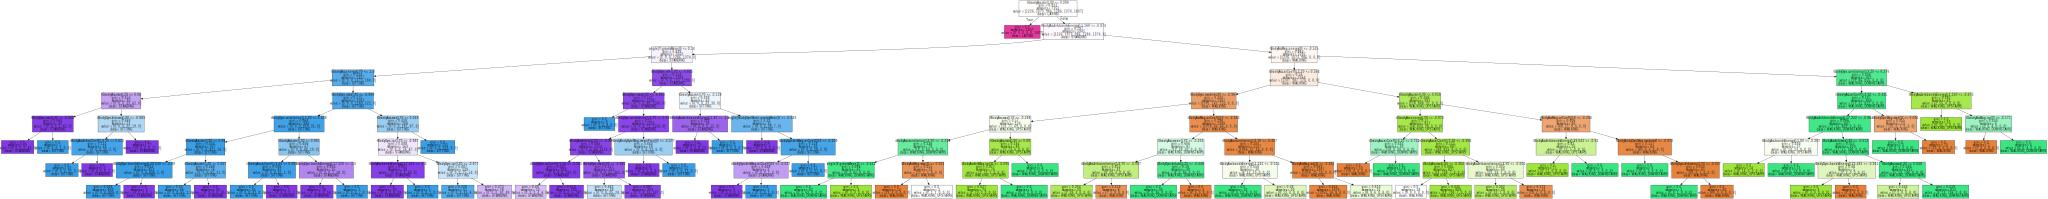

In [275]:
# tree.dot 파일이 생성(export_graphviz 의 실행 결과가 저장)
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)    